In [60]:
import pandas as pd
import numpy as np

In [61]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [62]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
x_train = train.drop(['label'],axis=1)
x_test = test.drop(['label'],axis=1)
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y_train = train['label']
y_test = test['label']
y_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [65]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [66]:
# Reshape the input data to the required shape (28, 28, 1)
x_train_reshaped = x_train.values.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.values.reshape(-1, 28, 28, 1)

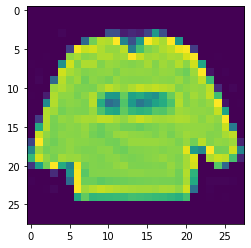

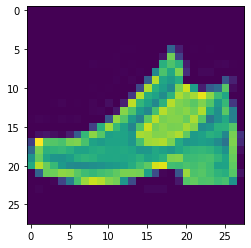

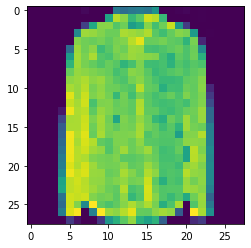

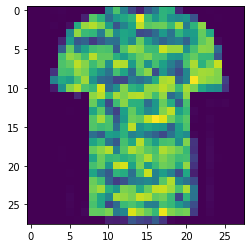

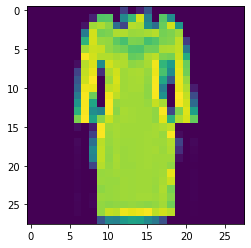

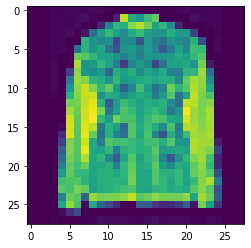

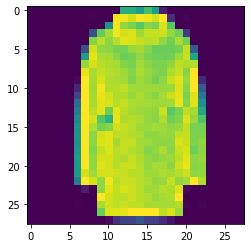

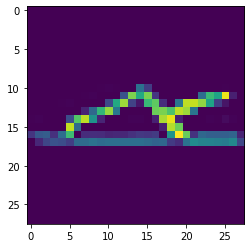

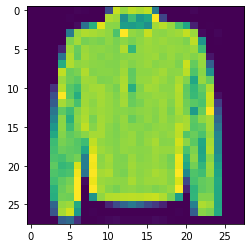

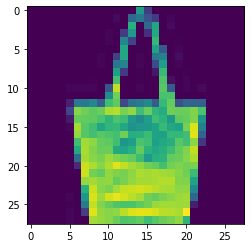

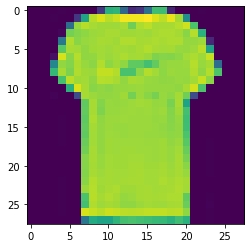

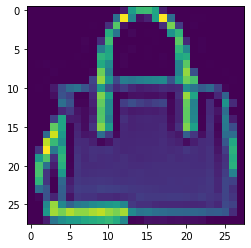

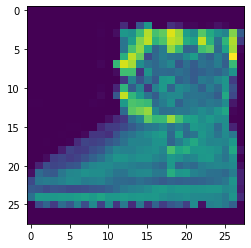

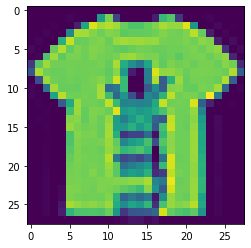

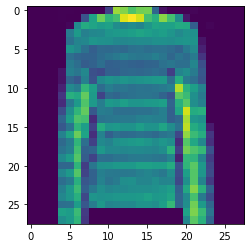

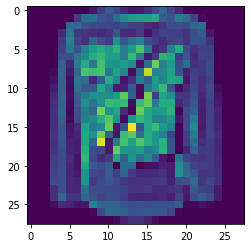

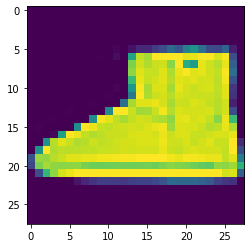

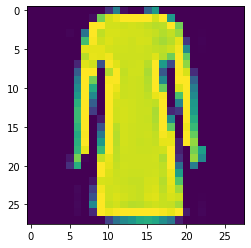

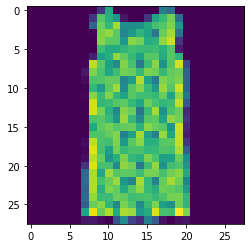

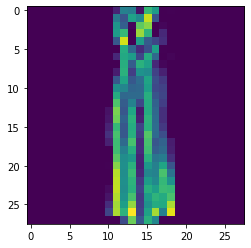

In [76]:
for i in range(20):
  #  print(labels[y_train[i]])
    plt.imshow(x_train_reshaped[i][:, :, 0])  # Display grayscale image
    plt.show()

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [69]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

In [72]:
model.fit(x_train_reshaped, y_train, epochs=2, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/2
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3822 - accuracy: 0.8648 - val_loss: 0.2963 - val_accuracy: 0.8959
Epoch 2/2
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2592 - accuracy: 0.9062 - val_loss: 0.2687 - val_accuracy: 0.9033


In [73]:
#labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(x_test_reshaped[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(x_test_reshaped[id_])
    plt.show()

1/1 [==============================] - 0s 76ms/step
shirt


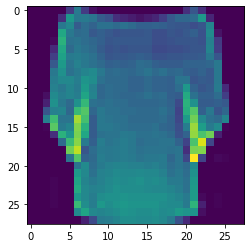

In [74]:
#predictions = model.predict(x_test_reshaped[:1])
predict(5)

1/1 [==============================] - 0s 31ms/step
trouser


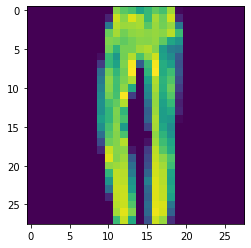

1/1 [==============================] - 0s 41ms/step
pullover


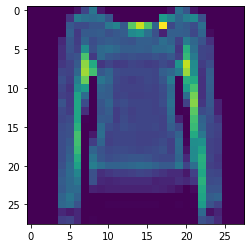

1/1 [==============================] - 0s 35ms/step
pullover


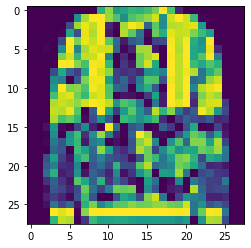

1/1 [==============================] - 0s 28ms/step
coat


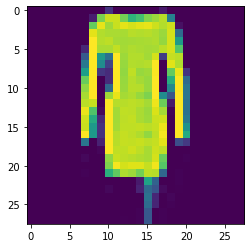

1/1 [==============================] - 0s 24ms/step
shirt


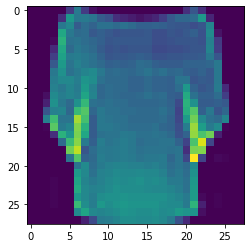

1/1 [==============================] - 0s 28ms/step
bag


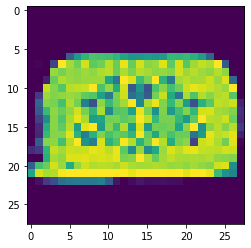

1/1 [==============================] - 0s 28ms/step
coat


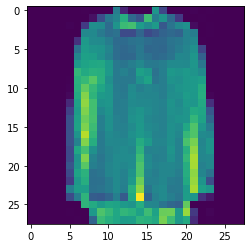

1/1 [==============================] - 0s 33ms/step
sandal


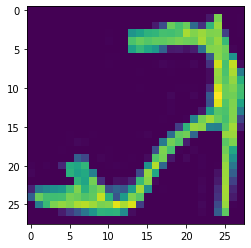

1/1 [==============================] - 0s 24ms/step
t_shirt


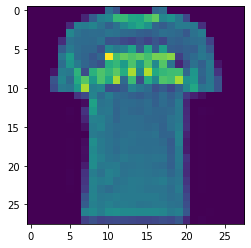

1/1 [==============================] - 0s 30ms/step
dress


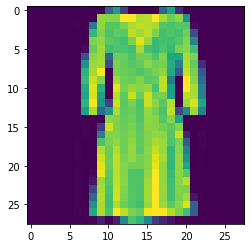

1/1 [==============================] - 0s 23ms/step
pullover


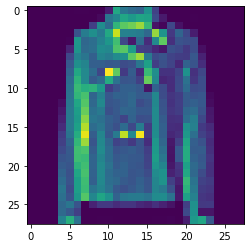

1/1 [==============================] - 0s 29ms/step
coat


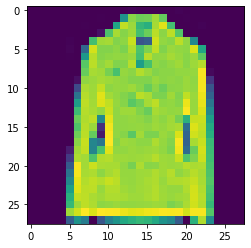

1/1 [==============================] - 0s 31ms/step
shirt


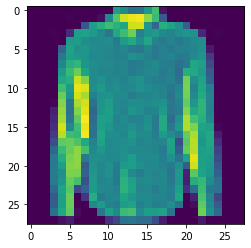

1/1 [==============================] - 0s 25ms/step
bag


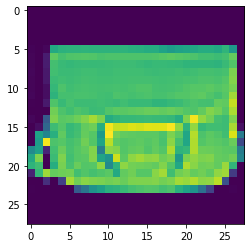

1/1 [==============================] - 0s 33ms/step
sandal


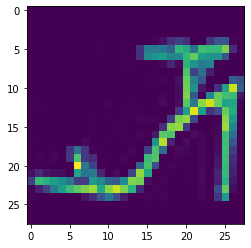

1/1 [==============================] - 0s 23ms/step
coat


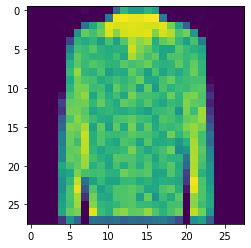

1/1 [==============================] - 0s 19ms/step
dress


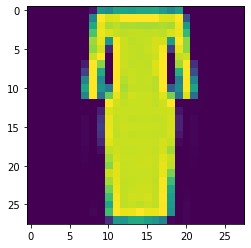

1/1 [==============================] - 0s 32ms/step
shirt


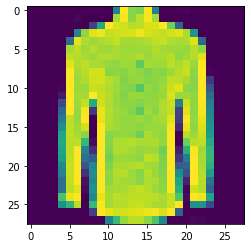

1/1 [==============================] - 0s 40ms/step
coat


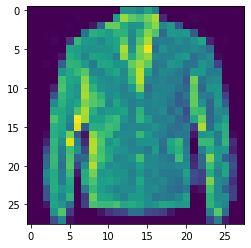

In [75]:
#label = labels[np.argmax(predictions)]
for i in range(1,20):
    predict(i)

In [77]:
loss,acc = model.evaluate(x_test_reshaped,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2687 - accuracy: 0.9033


In [78]:
help(Conv2D)

Help on class Conv2D in module keras.layers.convolutional.conv2d:

class Conv2D(keras.layers.convolutional.base_conv.Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28